# Preprocessing & EDA

Meteorological Parameters & Data Units

| Code      | Meaning      | Unit   |
|-------------|-------------|------------|
| temp   | Air Temperature   | °C   |
| dwpt   | Dew Point   | °C   |
| rhum   | Relative Humidity  | %   |
| prcp   | Total Precipitation  | mm   |
| snow   | Snow Depth   | mm   |
| wdir   | Wind (From) Direction   | Degrees   |
| wspd   | Average Wind Speed   | km/h   |
| wpgt   | Wind Peak Gust   | km/h   |
| pres   | Sea-Leavel Air Pressure   | hPa   |
| tsun   | Total Sunshine Duration   | Minutes
| coco   | Weather Condition Code   | 

Weather Condition Codes
| Code | Weather Condition       |
|------|--------------------------|
| 1    | Clear                   |
| 2    | Fair                    |
| 3    | Cloudy                  |
| 4    | Overcast                |
| 5    | Fog                     |
| 6    | Freezing Fog            |
| 7    | Light Rain              |
| 8    | Rain                    |
| 9    | Heavy Rain              |
| 10   | Freezing Rain           |
| 11   | Heavy Freezing Rain     |
| 12   | Sleet                   |
| 13   | Heavy Sleet             |
| 14   | Light Snowfall          |
| 15   | Snowfall                |
| 16   | Heavy Snowfall          |
| 17   | Rain Shower             |
| 18   | Heavy Rain Shower       |
| 19   | Sleet Shower            |
| 20   | Heavy Sleet Shower      |
| 21   | Snow Shower             |
| 22   | Heavy Snow Shower       |
| 23   | Lightning               |
| 24   | Hail                    |
| 25   | Thunderstorm            |
| 26   | Heavy Thunderstorm      |
| 27   | Storm                   |

source: https://dev.meteostat.net/formats.html#meteorological-parameters

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium

In [5]:
data = pd.read_csv('./../data/raw/weatherQN_2021_2025.csv')
data.head(10)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-01-02 00:00:00,20.0,17.4,85.0,NaN,NaN,350.0,20.2,NaN,1017.9,NaN,NaN
1,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,NaN,343.0,17.6,NaN,1016.1,NaN,NaN
2,2021-01-02 06:00:00,19.8,17.8,88.0,0.1,NaN,339.0,17.6,NaN,1016.7,NaN,NaN
3,2021-01-02 09:00:00,20.2,18.3,89.0,0.2,NaN,347.0,18.7,NaN,1018.4,NaN,NaN
4,2021-01-02 12:00:00,22.0,18.0,78.0,0.1,NaN,3.0,28.4,NaN,1016.4,NaN,NaN
5,2021-01-02 15:00:00,21.4,18.2,82.0,0.2,NaN,2.0,27.4,NaN,1015.0,NaN,NaN
6,2021-01-02 18:00:00,20.4,18.5,89.0,0.4,NaN,350.0,18.0,NaN,1016.3,NaN,NaN
7,2021-01-02 21:00:00,20.2,18.5,90.0,0.2,NaN,344.0,17.6,NaN,1017.6,NaN,NaN
8,2021-01-03 00:00:00,20.1,18.6,91.0,0.3,NaN,345.0,16.2,NaN,1017.3,NaN,NaN
9,2021-01-03 03:00:00,19.9,18.4,91.0,0.1,NaN,333.0,14.0,NaN,1015.2,NaN,NaN


In [6]:
data.shape

(12131, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12131 entries, 0 to 12130
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    12131 non-null  object 
 1   temp    12131 non-null  float64
 2   dwpt    12131 non-null  float64
 3   rhum    12131 non-null  float64
 4   prcp    12098 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    12131 non-null  float64
 7   wspd    12131 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    12131 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    7890 non-null   float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [8]:
data.isna().sum()

time        0
temp        0
dwpt        0
rhum        0
prcp       33
snow    12131
wdir        0
wspd        0
wpgt    12131
pres        0
tsun    12131
coco     4241
dtype: int64

Some columns have a significant amount of missing values:

- **`prcp`** : 89 values are missing.  
- **`snow`** ,**`wpgt`** and **`tsun`** : No data available (entirely null).  
- **`coco`** : 12713 values are missing.  


In [9]:
# Drop 
data.drop(columns=['snow', 'wpgt', 'tsun'], inplace=True)

In [10]:
data["year"] = pd.to_datetime(data["time"]).dt.year
data["month"] = pd.to_datetime(data["time"]).dt.month
data["day"] = pd.to_datetime(data["time"]).dt.day
data["hour"] = pd.to_datetime(data["time"]).dt.hour

In [11]:
data["year"].value_counts()

year
2023    2920
2022    2914
2021    2912
2024    2871
2025     514
Name: count, dtype: int64

 **2025**: not complete (only partial data available for this year).  

In [12]:
# we will drop it
data = data[data["year"] != 2025]

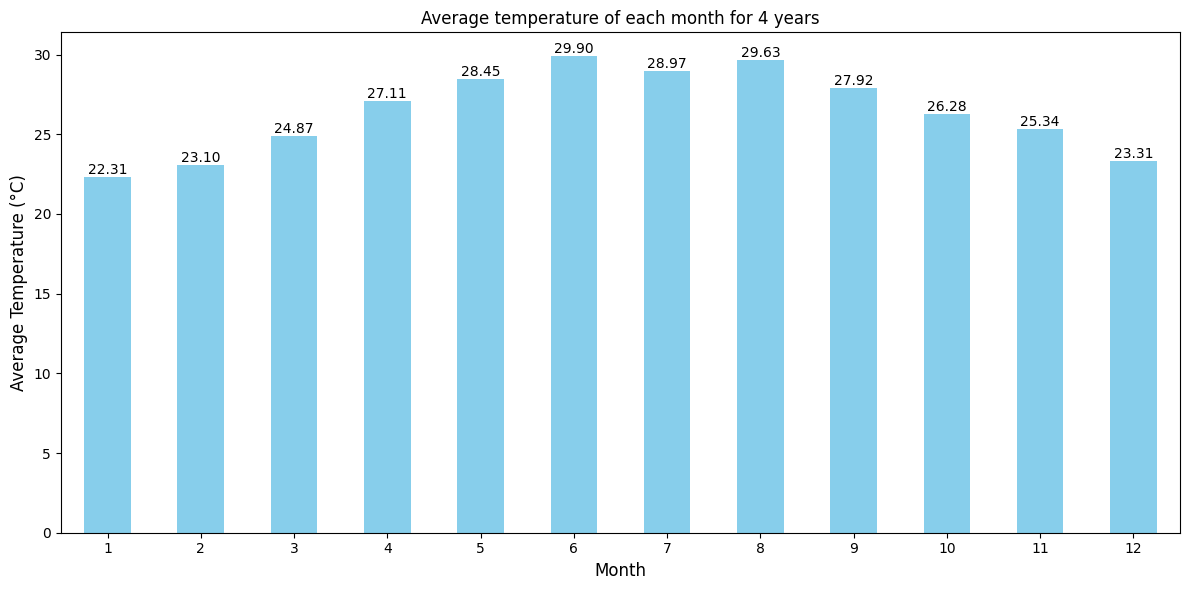

In [13]:
# Select years of interest and filter data
df_filtered = data[data['year'].isin([2021, 2022, 2023, 2024])]

# Calculate and plot monthly average temperature
ax = df_filtered.groupby('month')['temp'].mean().plot(
    kind='bar', figsize=(12, 6), color='skyblue', title='Average temperature of each month for 4 years'
)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
# Average rhum each month of each year
monthly_avg_rhum = df_filtered.groupby(['year', 'month'])['rhum'].mean()
monthly_avg_rhum

year  month
2021  1        83.408333
      2        82.196429
      3        85.294355
      4        83.912500
      5        80.995968
      6        64.962500
      7        69.830645
      8        71.048387
      9        85.287500
      10       86.794355
      11       89.645833
      12       82.322581
2022  1        85.782258
      2        85.361607
      3        85.608871
      4        85.854167
      5        83.582645
      6        76.829167
      7        79.794355
      8        80.391129
      9        85.245833
      10       84.479839
      11       85.912500
      12       82.625000
2023  1        84.322581
      2        86.107143
      3        83.189516
      4        81.237500
      5        80.471774
      6        72.958333
      7        73.512097
      8        65.858871
      9        80.750000
      10       87.903226
      11       85.187500
      12       86.858871
2024  1        83.169355
      2        85.650862
      3        84.612903
      4      

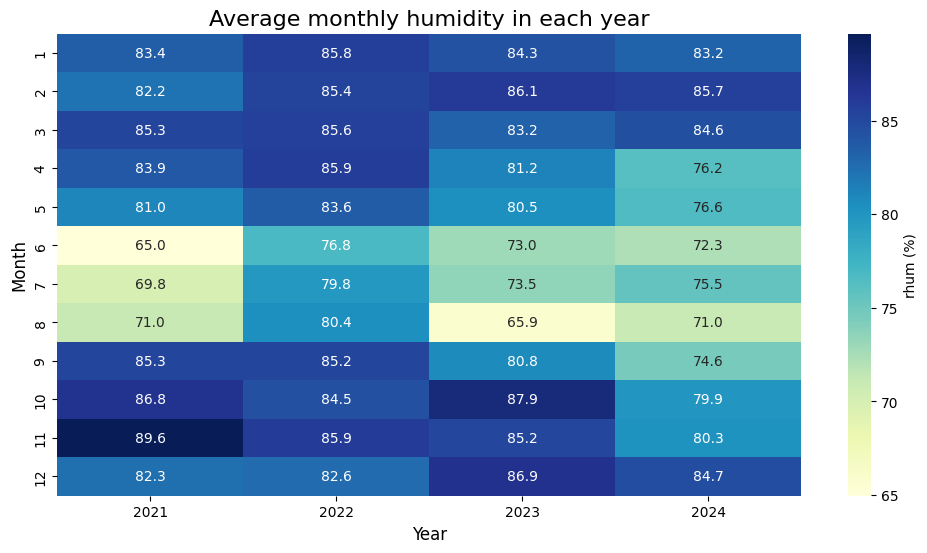

In [15]:
heatmap_data = monthly_avg_rhum.unstack(level=0) 
# Heatmap
plt.figure(figsize=(12, 6)) 
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'rhum (%)'})
plt.title("Average monthly humidity in each year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.show()

- Emperature and humidity exhibit an inverse relationship throughout the seasons. During summer (June to August), temperatures peak at 28-30°C, while humidity drops to its lowest (66-73%), resulting in a hot and dry feeling.
- In contrast, at the end of the year (September to December), as temperatures decrease to 23-26°C, humidity rises above 85%, bringing cooler and more humid conditions, often accompanied by rain or cold air.